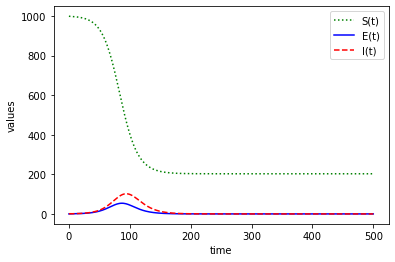

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,De,Di):
    R0 = 2
    N = sum(z)
    S = z[0]
    E = z[1]
    I = z[2]
    R = z[3]
    dSdt = -(S*I*R0)/(Di*N)
    dEdt = S*I*R0/(Di*N)-E/De
    dIdt = E/De - I/Di
    dRdt = I/Di
    dzdt = [dSdt, dEdt, dIdt, dRdt]
    return dzdt

# R node
De = 4
Di = 8
# initial condition
z0 = [999,0,1,0]

# number of time points
n = 401

# time points
t = np.linspace(0,500,n)

# store solution
S = np.empty_like(t)
E = np.empty_like(t)
I = np.empty_like(t)
R = np.empty_like(t)

# record initial conditions
S[0] = z0[0]
E[0] = z0[1]
I[0] = z0[2]
R[0] = z0[3]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(De,Di))
    # store solution for plotting
    S[i] = z[1][0]
    E[i] = z[1][1]
    I[i] = z[1][2]
    R[i] = z[1][3]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,S,'g:',label='S(t)')
plt.plot(t,E,'b-',label='E(t)')
plt.plot(t,I,'r--',label='I(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()